In [ ]:
pip install squarify

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install numpy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import style
style.use('ggplot')
import pandas as pd
import numpy as np

#import re
#import unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from nltk.corpus import stopwords
#from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay


import matplotlib.ticker as mtick
palette = sns.color_palette("Blues")
palette.reverse()
import squarify

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Amazon_us/amazon_reviews_us_Digital_Video_Games_v1_00.tsv", sep='\t', on_bad_lines='skip')

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/Amazon_us/amazon_reviews_us_Wireless_v1_00.tsv", sep='\t', on_bad_lines='skip')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,N,N,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome,2015-08-31
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,N,Y,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,N,Y,Five Stars,Perfect,2015-08-31
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,N,Y,Five Stars,Awesome!,2015-08-31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144724 entries, 0 to 144723
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        144724 non-null  object
 1   customer_id        144724 non-null  int64 
 2   review_id          144724 non-null  object
 3   product_id         144724 non-null  object
 4   product_parent     144724 non-null  int64 
 5   product_title      144724 non-null  object
 6   product_category   144724 non-null  object
 7   star_rating        144724 non-null  int64 
 8   helpful_votes      144724 non-null  int64 
 9   total_votes        144724 non-null  int64 
 10  vine               144724 non-null  object
 11  verified_purchase  144724 non-null  object
 12  review_headline    144721 non-null  object
 13  review_body        144721 non-null  object
 14  review_date        144721 non-null  object
dtypes: int64(5), object(10)
memory usage: 16.6+ MB


In [ ]:
df.shape

(144724, 15)

In [ ]:
df.dtypes

marketplace          object
customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
product_category     object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtype: object

In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      3
review_body          3
review_date          3
dtype: int64

In [ ]:
# check for duplicate rows
data_dup = df.duplicated().any()
data_dup

False

In [ ]:
# drop rows with missing value
df.dropna(axis=0, inplace=True)

In [ ]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [ ]:
df.describe().round(2)

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,144715.00,1.447150e+05,144715.00,144715.00,144715.00
mean,25093757.80,4.585588e+08,3.85,1.49,2.70
std,15729365.15,2.720984e+08,1.54,21.66,24.18
min,10632.00,2.435250e+05,1.00,0.00,0.00
25%,11961758.00,2.328037e+08,3.00,0.00,0.00
50%,22918840.00,3.889339e+08,5.00,0.00,0.00
75%,39848776.50,6.865929e+08,5.00,1.00,2.00
max,53095999.00,9.996412e+08,5.00,5068.00,5251.00


In [ ]:
df['verified_purchase'].value_counts()

verified_purchase
Y    123650
N     21065
Name: count, dtype: int64

In [ ]:
df['star_rating'].value_counts()

star_rating
5    80227
1    24845
4    20328
3    11589
2     7726
Name: count, dtype: int64

In [ ]:
df['product_category'].value_counts()

product_category
Digital_Video_Games    144715
Name: count, dtype: int64

In [ ]:
df['product_title'].nunique()

6946

In [ ]:
df['product_title'].value_counts()

product_title
Playstation Network Card                            13516
Xbox Live Subscription                               7262
Playstation Plus Subscription                        4677
SimCity - Limited Edition                            3419
Xbox Live Gift Card                                  3405
                                                    ...  
TV Show King [Online Game Code]                         1
LUMINES Supernova [Online Game Code]                    1
Forgotten Riddles: The Mayan Princess [Download]        1
Neverland [Download]                                    1
Tropico 5 - Supervillian [Online Game Code]             1
Name: count, Length: 6946, dtype: int64

In [ ]:
dfproduct_title = df['product_title'].value_counts().rename_axis('product_title').reset_index(name='Quantity')
dfproduct_title

,product_title,Quantity
0,Playstation Network Card,13516
1,Xbox Live Subscription,7262
2,Playstation Plus Subscription,4677
3,SimCity - Limited Edition,3419
4,Xbox Live Gift Card,3405
...,...,...
6941,TV Show King [Online Game Code],1
6942,LUMINES Supernova [Online Game Code],1
6943,Forgotten Riddles: The Mayan Princess [Download],1
6944,Neverland [Download],1


In [ ]:
# Drop all Categories which are 1

dfproduct_title.drop(dfproduct_title[dfproduct_title['Quantity'] <=3000].index, inplace = True)
print(dfproduct_title)

                   product_title  Quantity
0       Playstation Network Card     13516
1         Xbox Live Subscription      7262
2  Playstation Plus Subscription      4677
3      SimCity - Limited Edition      3419
4            Xbox Live Gift Card      3405
5      Xbox 360 Live Points Card      3033


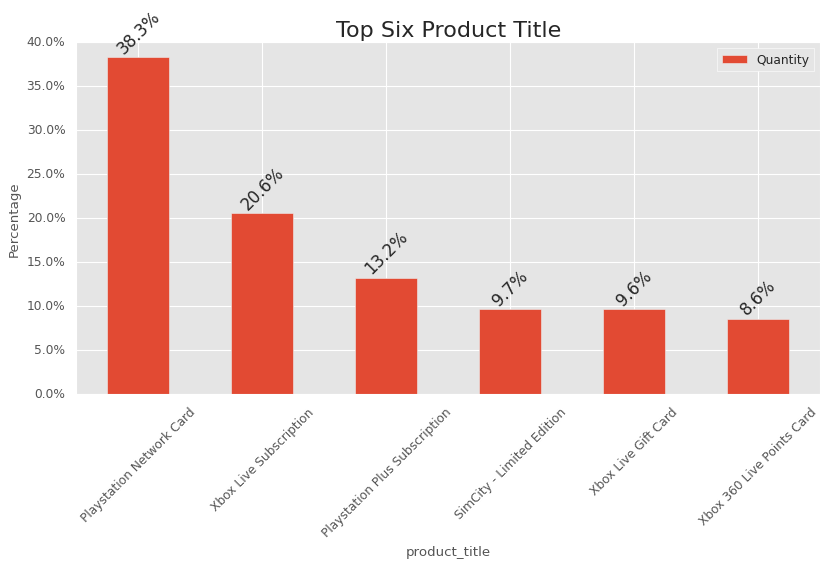

In [ ]:

# Convert Quantity to percentage
dfproduct_title['Quantity'] = (dfproduct_title['Quantity'] / dfproduct_title['Quantity'].sum()) * 100

# Truncate x-axis labels to a certain number of characters
max_label_length = 30  # Set the maximum number of characters for labels
truncated_labels = [label[:max_label_length] for label in dfproduct_title['product_title']]

# Create the bar plot
ax = dfproduct_title.plot.bar(x='product_title', y='Quantity', rot=45, figsize=(12, 5.5))
for container in ax.containers:
    ax.bar_label(container, labels=dfproduct_title['Quantity'].round(1).astype('str') + '%', fontsize=15, rotation=45)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel('Percentage')
    ax.set_title('Top Six Product Title', fontsize=20)

# Set the truncated labels on the x-axis
ax.set_xticklabels(truncated_labels)

plt.show()


In [ ]:
dfproduct_title['product_title'].iloc[0]

'Playstation Network Card'

In [ ]:
# Dataframe of female gender only
df_product = df[df['product_title']=='Playstation Network Card']
df_product.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
7,US,6057518,R44QKV6FE5CJ2,B004RMK4BC,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Super,2015-08-31
8,US,20715661,R2TX1KLPXXXNYS,B00K59HKIQ,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Easy & Fast,"Excellent, fast and secure!!!",2015-08-31
9,US,26540306,R1JEEW4C6R89BA,B00K59HKIQ,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Ok,2015-08-31
15,US,2239522,RA1246M1OMDWC,B004RMK4P8,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,Great,2015-08-31
19,US,5587610,R24NEKNR01VEHU,B00GAC1D2G,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Just amazing,"Very fast to receive, and ofc a trustworthy an...",2015-08-31


In [ ]:
df_product.shape

(13516, 15)

## **EDA**

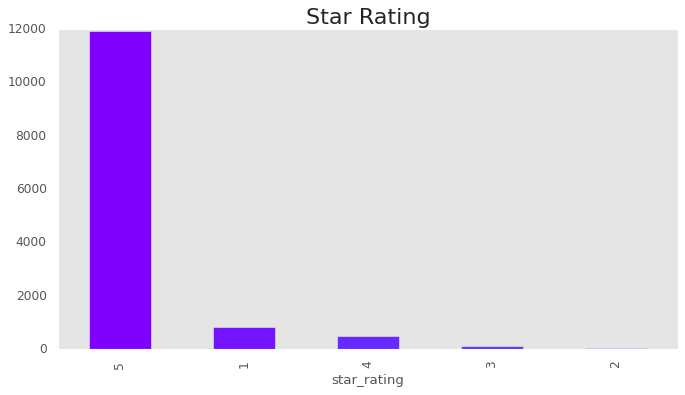

<Figure size 640x480 with 0 Axes>

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df_product.star_rating.value_counts().head(10).plot.bar(color = color, figsize=(10,5))
plt.title('Star Rating', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
#plt.savefig('Reviwes.png', dpi=300, bbox_inches='tight')
plt.show()
plt.savefig('general_reviews_graph.png', dpi=300, bbox_inches='tight')

In [ ]:
#Creating three categories for reviews : Positive(4-5), Negative(1-2), Neutral(3)
#df_product["review_sentiment"] = pd.cut(
    #x=df_product["star_rating"],
    #bins=[0, 2, 3,np.inf],
    #labels=["Negative", "Neutral", "Positive"],
#)

In [ ]:
# Function to categorize sentiment
def categorize_sentiment(rating):
    if rating >= 4:
        return "Positive"
    else:
        return "Negative"

# Apply the function to create 'Sentiment' column
df_product['review_sentiment'] = df['star_rating'].apply(categorize_sentiment)


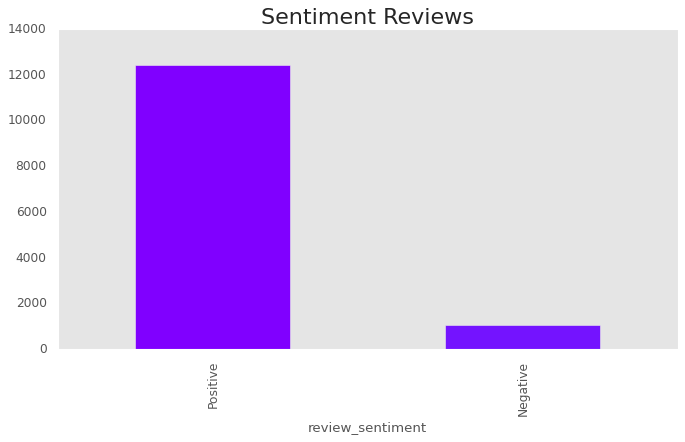

<Figure size 640x480 with 0 Axes>

In [ ]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df_product.review_sentiment.value_counts().head(10).plot.bar(color = color, figsize=(10,5))
plt.title('Sentiment Reviews', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
#plt.savefig('Reviwes.png', dpi=300, bbox_inches='tight')
plt.show()
plt.savefig('general_reviews_graph.png', dpi=300, bbox_inches='tight')

## **Data Preprocessing**

In [ ]:
# Normalizing Case Folding
df_product['review_body'] = df_product['review_body'].str.lower()

# Punctuations
df_product['review_body'] = df_product['review_body'].str.replace('[^\w\s]', '')

# Numbers
df_product['review_body'] = df_product['review_body'].str.replace('\d', '')

In [ ]:
# Stopwords
import nltk
#print(nltk.__version__)

nltk.download('stopwords')
sw = stopwords.words('english')
sw.extend(['br', 'amazon'])
df_product['review_body'] = df_product['review_body'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Rarewords

drops = pd.Series(' '.join(df_product['review_body']).split()).value_counts()[-1000:]
df_product['review_body'] = df_product['review_body'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
# Tokenization

nltk.download("punkt")
df_product['review_body'].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


7                                               [super]
8                             [excellent, fast, secure]
9                                                  [ok]
15                                              [great]
19    [fast, receive, ofc, trustworthy, safe, place,...
Name: review_body, dtype: object

In [ ]:
# Lemmatization

nltk.download('wordnet')
df_product['reviewText'] = df_product['review_body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df_product['reviewText'].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


7                                                 super
8                             excellent, fast secure!!!
9                                                    ok
15                                                great
19    fast receive, ofc trustworthy safe place buy u...
21                               got allmost right away
22                                                 nice
23                fast transaction everything go smooth
29                                               great！
42                                            excellent
Name: reviewText, dtype: object

## **Text Visualization**

In [ ]:
tf = df_product["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,super,114.0
1,"excellent,",44.0
2,fast,1129.0
3,secure!!!,1.0
4,ok,219.0


In [ ]:
tf["words"].nunique()

13458

In [ ]:
df_product.sample(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_sentiment,reviewText
92948,US,12599214,R2WEDA0T9T8TT2,B004RMK4BC,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Fantastic,thanks much i'm happy pf service use regulary ...,2013-07-02,Positive,thanks much i'm happy pf service use regulary ...
70331,US,15869787,R2EO3E2JSXHJ1G,B004RMK4P8,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Works,worked complaints. thanks providing this. easy...,2014-01-15,Positive,worked complaints. thanks providing this. easy...
27035,US,691025,R1A0HVZ1FK96FL,B00GAC1D2G,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,amazing,2015-01-15,Positive,amazing
699,US,1468259,R2LHSWXUU52QRB,B00XJZHJCA,384246568,Playstation Network Card,Digital_Video_Games,5,0,0,N,Y,Five Stars,good,2015-08-24,Positive,good
8390,US,580459,R11E1MUP5X0ZEV,B00GAC1D2G,384246568,Playstation Network Card,Digital_Video_Games,3,0,0,N,Y,Three Stars,wow,2015-06-14,Negative,wow


In [ ]:
def text_visulaization(dataframe, dependent_var, barplot=True, wordcloud=True):
  # Calculation of Term Frequencies
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
  tf.columns = ["words", "tf"]

  if barplot:
    # Bar Plot
    plt.figure(figsize=[20, 20])
    tf[tf["tf"]>1000].plot.barh(x="words", y="tf", )
    plt.title("Top 10 Most Frequently Used Words", fontsize=15)
    plt.show()

  if wordcloud:
    # WordCloud
    text = " ".join(i for i in dataframe[dependent_var])
    wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)
    plt.figure(figsize=[10, 10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Wordcloud for Most Frequently Used Words", fontsize=19)
    plt.show()
    wordcloud.to_file("wordcloud.png")

<Figure size 1600x1600 with 0 Axes>

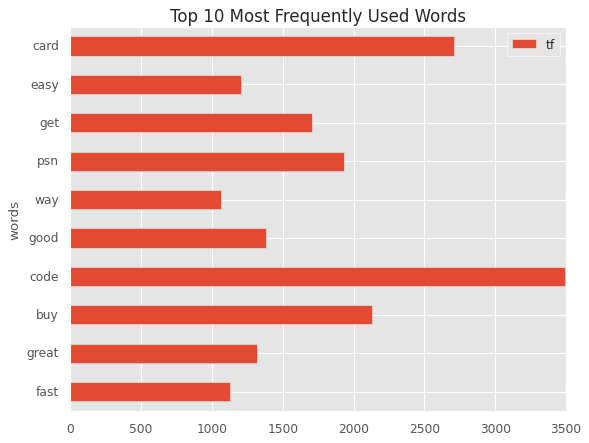

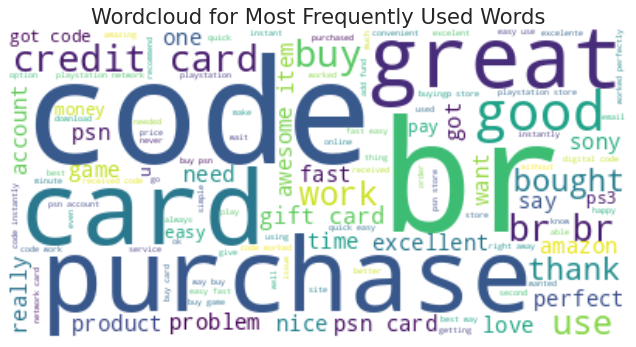

In [ ]:
text_visulaization(df_product, "reviewText")

In [ ]:
# Create a negative wordcloud
df_neg = df_product[df_product["review_sentiment"]=="Negative"]

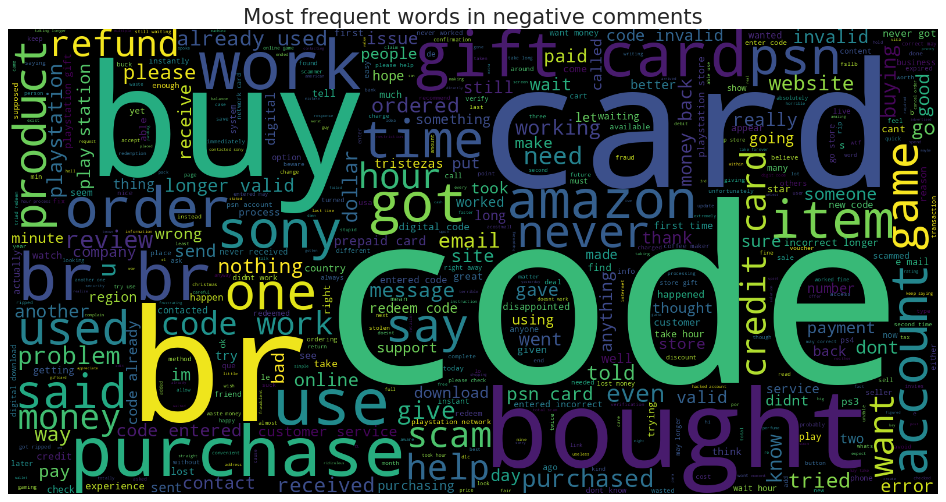

In [ ]:
text = ' '.join([word for word in df_neg['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

In [ ]:
# Create a positive wordcloud
df_pos = df_product[df_product["review_sentiment"]=="Positive"]

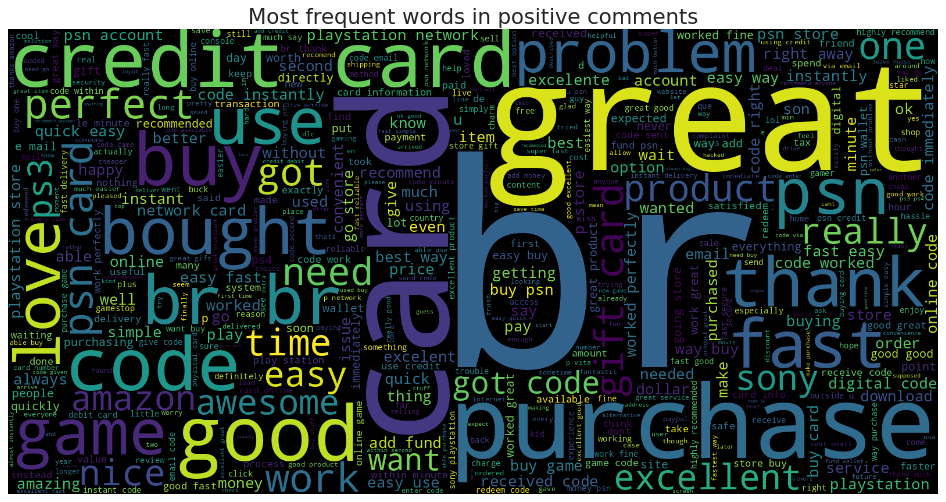

In [ ]:
text = ' '.join([word for word in df_pos['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

**Creating Bigram**

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the text into words
df_product['tokens'] = df_product['reviewText'].apply(lambda x: word_tokenize(x.lower()))

In [ ]:
from nltk.util import bigrams
import collections
from collections import Counter

# Generate bigrams for each row
df_product['bigrams'] = df_product['tokens'].apply(lambda x: list(bigrams(x)))

# Calculate the frequency of bigrams across the entire DataFrame
all_bigrams = [bigram for sublist in df_product['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)

# Display the most common bigrams
print(bigram_counts.most_common(10))  # Change 10 to the number of top bigrams you want to display


[(('/', '>'), 2439), (('<', 'br'), 2409), (('br', '/'), 2375), (('!', '!'), 1830), (('credit', 'card'), 680), (('>', '<'), 662), (('gift', 'card'), 482), (('get', 'code'), 480), (('psn', 'card'), 427), (('it', '.'), 381)]


In [ ]:
bigram_count = bigram_counts.most_common(10)

df_bigram = pd.DataFrame(bigram_count, columns=['Bigram', 'Frequency'])
df_bigram

,Bigram,Frequency
0,"(/, >)",2439
1,"(<, br)",2409
2,"(br, /)",2375
3,"(!, !)",1830
4,"(credit, card)",680
5,"(>, <)",662
6,"(gift, card)",482
7,"(get, code)",480
8,"(psn, card)",427
9,"(it, .)",381


## **LDA MODELLING**

In [ ]:
from gensim import models
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import nltk
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))



data = df_product['reviewText'].values.tolist()
data_words = list(sent_to_words(data))


#print(data_words[:1][0][:30])
print(data_words[:1])

[['super']]


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1)]


In [ ]:
from pprint import pprint

# number of topics
num_topics = 2

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"card" + 0.025*"br" + 0.020*"psn" + 0.019*"buy" + 0.018*"good" + '
  '0.013*"code" + 0.012*"game" + 0.011*"like" + 0.011*"credit" + '
  '0.010*"worked"'),
 (1,
  '0.045*"code" + 0.030*"card" + 0.021*"br" + 0.020*"psn" + 0.019*"get" + '
  '0.019*"buy" + 0.014*"easy" + 0.012*"great" + 0.012*"store" + 0.011*"it"')]


##**DORMINANT TOPIC**

In [ ]:
#LDA Model Perfromance check
print("Perplexity: ",lda_model.log_perplexity(corpus))

#compute coherence score
from gensim.models import CoherenceModel
coherence_model_lda=CoherenceModel(model=lda_model,texts=data_words,dictionary=id2word,coherence='c_v')

coherence_lda=coherence_model_lda.get_coherence()
print('Coherence Score: ',coherence_lda)

Perplexity:  -6.657227285510281
Coherence Score:  0.6055570008517477


In [ ]:
import pyLDAvis.gensim
import pyLDAvis

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model,corpus,id2word)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.053048  0.0       1        1  69.605511
0     -0.053048  0.0       2        1  30.394489, topic_info=        Term         Freq        Total Category  logprob  loglift
28      good   834.000000   834.000000  Default  30.0000  30.0000
81      like   626.000000   626.000000  Default  29.0000  29.0000
162       br  2685.000000  2685.000000  Default  28.0000  28.0000
284  perfect   334.000000   334.000000  Default  27.0000  27.0000
58    worked   620.000000   620.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
49       get   199.987447  1833.094776   Topic2  -5.2183  -1.0246
44       way   180.106450  1134.350970   Topic2  -5.3230  -0.6494
292   online   166.966059   795.196015   Topic2  -5.3987  -0.3699
17       got   163.772408   697.773125   Topic2  -5.4180  -0.2585
59      easy   165.490776  1373.784681   Topic2  -5.4076  -0.9255

[202 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
126       1  0.724322  account
126       2  0.276200  account
2407      1  0.957174    after
2407      2  0.039882    after
1691      1  0.118617       al
...     ...       ...      ...
1286      2  0.061354    write
1723      1  0.931897  writing
1723      2  0.054817  writing
1469      1  0.966038       xd
1469      2  0.031163       xd

[288 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [ ]:
def compute_coherence_values(dictionary,corpus,texts,start,limit,step):
    coherence_vals=[]
    model_list=[]

    for num_topics in range(start,limit,step):
        # building LDA Model
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,
                                              num_topics=num_topics,random_state=100,
                                              chunksize=100,passes=10,alpha='auto',per_word_topics=True)

        model_list.append(model)

        coherencemodel=CoherenceModel(model=model,texts=texts,dictionary=dictionary,coherence='c_v')

        coherence_vals.append(coherencemodel.get_coherence())
    return model_list,coherence_vals

model_list,coherence_vals=compute_coherence_values(dictionary=id2word,
                                                   corpus=corpus,texts=data_words,
                                                   start=2,limit=20,step=4)

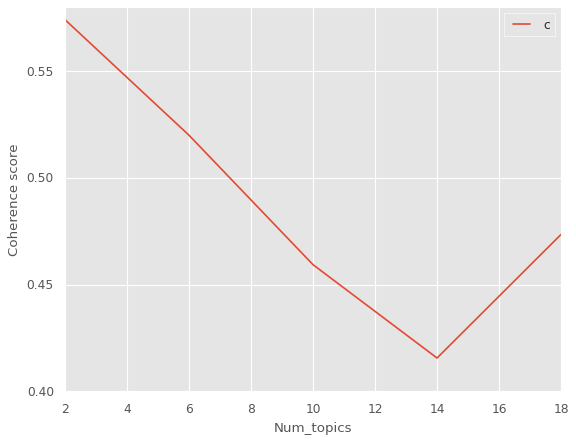

In [ ]:
import matplotlib.pyplot as plt

# visualize the optimal LDA Model
limit=20
start=2
step=4
x=range(start,limit,step)

plt.plot(x,coherence_vals)
plt.xlabel('Num_topics')
plt.ylabel('Coherence score')
plt.legend(('coh'),loc='best')
plt.show()


In [ ]:
for m, cv in zip(x,coherence_vals):
    print("num topics: ",m,'has coherence value of :',round(cv,4))

num topics:  2 has coherence value of : 0.5742
num topics:  6 has coherence value of : 0.52
num topics:  10 has coherence value of : 0.4594
num topics:  14 has coherence value of : 0.4156
num topics:  18 has coherence value of : 0.4735


In [ ]:
optimal_model=model_list[0]  # number of topics is 2
model_topics=optimal_model.show_topics(formatted=False)

pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.047*"card" + 0.035*"psn" + 0.029*"buy" + 0.021*"get" + 0.017*"credit" + '
  '0.014*"purchase" + 0.014*"store" + 0.013*"easy" + 0.012*"great" + '
  '0.012*"way"'),
 (1,
  '0.106*"code" + 0.061*"br" + 0.024*"fast" + 0.017*"work" + 0.016*"good" + '
  '0.014*"got" + 0.014*"instantly" + 0.013*"email" + 0.012*"worked" + '
  '0.010*"de"')]


In [ ]:
model_topics=optimal_model.show_topics(formatted=False)
print(model_topics)

[(0, [('card', 0.04705113), ('psn', 0.0346425), ('buy', 0.029148037), ('get', 0.020702932), ('credit', 0.016513892), ('purchase', 0.014473598), ('store', 0.01407402), ('easy', 0.013030953), ('great', 0.012202014), ('way', 0.012177966)]), (1, [('code', 0.10571756), ('br', 0.06098118), ('fast', 0.023853026), ('work', 0.016955314), ('good', 0.016398901), ('got', 0.014056406), ('instantly', 0.013882532), ('email', 0.013454855), ('worked', 0.012108413), ('de', 0.010385317)])]


In [ ]:
model_topics1=optimal_model.show_topics(formatted=True)
print(model_topics1)

[(0, '0.047*"card" + 0.035*"psn" + 0.029*"buy" + 0.021*"get" + 0.017*"credit" + 0.014*"purchase" + 0.014*"store" + 0.013*"easy" + 0.012*"great" + 0.012*"way"'), (1, '0.106*"code" + 0.061*"br" + 0.024*"fast" + 0.017*"work" + 0.016*"good" + 0.014*"got" + 0.014*"instantly" + 0.013*"email" + 0.012*"worked" + 0.010*"de"')]


In [ ]:
pyLDAvis.enable_notebook()
vis1=pyLDAvis.gensim.prepare(optimal_model,corpus,id2word)
vis1

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.271333  0.0       1        1  67.577807
1     -0.271333  0.0       2        1  32.422193, topic_info=        Term         Freq        Total Category  logprob  loglift
25      code  4165.000000  4165.000000  Default  30.0000  30.0000
162       br  2412.000000  2412.000000  Default  29.0000  29.0000
7       card  3862.000000  3862.000000  Default  28.0000  28.0000
42       psn  2844.000000  2844.000000  Default  27.0000  27.0000
2       fast   940.000000   940.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
34     thank   186.094532   186.766628   Topic2  -5.3548   1.1227
52   service   372.795585   377.018503   Topic2  -4.6601   1.1151
182    price   269.373436   277.619787   Topic2  -4.9850   1.0962
92      wait   355.742401   395.376474   Topic2  -4.7069   1.0207
293     best   264.045052   554.180849   Topic2  -5.0050   0.3850

[113 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
126       1  0.998828  account
126       2  0.001206  account
134       1  0.998974      add
202       1  0.890589   amazon
202       2  0.108405   amazon
...     ...       ...      ...
72        1  0.001496     work
72        2  0.999312     work
58        2  0.999300   worked
89        1  0.999267    would
89        2  0.002117    would

[132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = []

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = row[0]
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant highest weighted topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df.append([int(topic_num), round(prop_topic, 4), topic_keywords])

    # Convert the list of lists into a DataFrame
    sent_topics_df = pd.DataFrame(sent_topics_df, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df


In [ ]:
df_sent_topic_keywords=format_topics_sentences(ldamodel=optimal_model,corpus=corpus,texts=data_words)
df_dominant_topic=df_sent_topic_keywords.reset_index()
df_dominant_topic.columns=['DocumentNo','Dominant_Topic','Perc_Contribution','Topic_Keywords','labels']

df_dominant_topic.sample(10)

,DocumentNo,Dominant_Topic,Perc_Contribution,Topic_Keywords,labels
2,2,0,0.5407,"card, psn, buy, get, credit, purchase, store, ...",[ok]
7150,7150,0,0.6757,"card, psn, buy, get, credit, purchase, store, ...","[truth, excellent, product, complaint]"
3083,3083,0,0.8580,"card, psn, buy, get, credit, purchase, store, ...","[better, knowing, credit, card, info, playstat..."
7496,7496,0,0.5416,"card, psn, buy, get, credit, purchase, store, ...",[advertised]
11018,11018,0,0.7671,"card, psn, buy, get, credit, purchase, store, ...","[awesome, product, get, save, money, gas, sinc..."
9421,9421,0,0.8585,"card, psn, buy, get, credit, purchase, store, ...","[hi, guys, br, this, card, beginning, could, p..."
1882,1882,0,0.5407,"card, psn, buy, get, credit, purchase, store, ...",[perfect]
12627,12627,0,0.6284,"card, psn, buy, get, credit, purchase, store, ...","[could, purchase, play, station, network, game..."
5857,5857,0,0.5406,"card, psn, buy, get, credit, purchase, store, ...",[good]
5234,5234,0,0.5422,"card, psn, buy, get, credit, purchase, store, ...",[smooth]


In [ ]:
df_sent_topic_keywords=format_topics_sentences(ldamodel=optimal_model,corpus=corpus,texts=data_words)
df_dominant_topic=df_sent_topic_keywords.reset_index()
df_dominant_topic.columns=['DocumentNo','Dominant_Topic','Perc_Contribution','Topic_Keywords','Labels']

df_dominant_topic.sample(10)

,DocumentNo,Dominant_Topic,Perc_Contribution,Topic_Keywords,Labels
6527,6527,0,0.5422,"card, psn, buy, get, credit, purchase, store, ...",[smooth]
11332,11332,0,0.5588,"card, psn, buy, get, credit, purchase, store, ...","[doubt, dollar, card, sent, email, minute, pla..."
11341,11341,1,0.6979,"code, br, fast, work, good, got, instantly, em...","[hour, long, wait, changed, code, inbox]"
630,630,0,0.6261,"card, psn, buy, get, credit, purchase, store, ...",[best]
850,850,1,0.5362,"code, br, fast, work, good, got, instantly, em...","[worked, promised]"
159,159,0,0.6038,"card, psn, buy, get, credit, purchase, store, ...","[got, code, psn, buying, another, soon]"
1984,1984,0,0.6087,"card, psn, buy, get, credit, purchase, store, ...","[excelent, easy]"
4444,4444,0,0.5719,"card, psn, buy, get, credit, purchase, store, ...",[guaranteed]
743,743,0,0.5950,"card, psn, buy, get, credit, purchase, store, ...","[well, it, psn, card, nothing, say, good, prod..."
5176,5176,0,0.5407,"card, psn, buy, get, credit, purchase, store, ...",[ok]


In [ ]:
print(df_dominant_topic.groupby('Dominant_Topic').count())

                DocumentNo  Perc_Contribution  Topic_Keywords  Labels
Dominant_Topic                                                       
0                    11620              11620           11620   11620
1                     1896               1896            1896    1896


In [ ]:
# showing best relevant document under each topic
topic_sentences_df =pd.DataFrame()
df_topic_sents_grped=df_dominant_topic.groupby('Dominant_Topic')

for i,grp in df_topic_sents_grped:
    topic_sentences_df=pd.concat([topic_sentences_df,grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)


#reset index
topic_sentences_df.reset_index(drop=True,inplace=True)

#Format
topic_sentences_df.columns=['Document No','Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

topic_sentences_df.head()

,Document No,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,12277,0,0.9584,"card, psn, buy, get, credit, purchase, store, ...","[feel, lazy, get, house, buy, playstation, net..."
1,12144,1,0.9630,"code, br, fast, work, good, got, instantly, em...","[elijo, esta, clasificasion, por, cuanto, pude..."


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_sent_topic_keywords['Dominant_Topic'].value_counts()
print(topic_counts)
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
print(topic_contribution)

Dominant_Topic
0    11620
1     1896
Name: count, dtype: int64
Dominant_Topic
0    0.8597
1    0.1403
Name: count, dtype: float64


In [ ]:
# Concatenate Column wise
df_dominant_topics = pd.concat([ topic_counts, topic_contribution], axis=1,)


# Show
df_dominant_topics.reset_index(inplace=True)


# Change Column names
df_dominant_topics.columns = ['Topic id', 'Num_Documents', 'Perc_Documents']

df_dominant_topics

,Topic id,Num_Documents,Perc_Documents
0,0,11620,0.8597
1,1,1896,0.1403


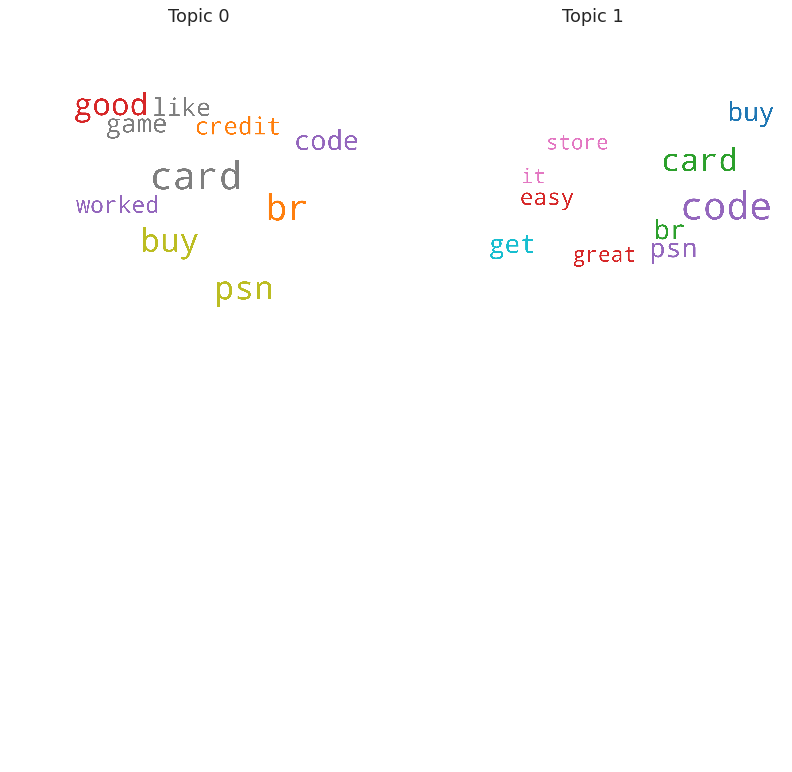

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=sw,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

num_subplots = min(len(topics), 4)  # Limiting to 4 subplots (2x2 grid)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i < num_subplots:
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    else:
        ax.axis('off')  # Deactivate unused subplots

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


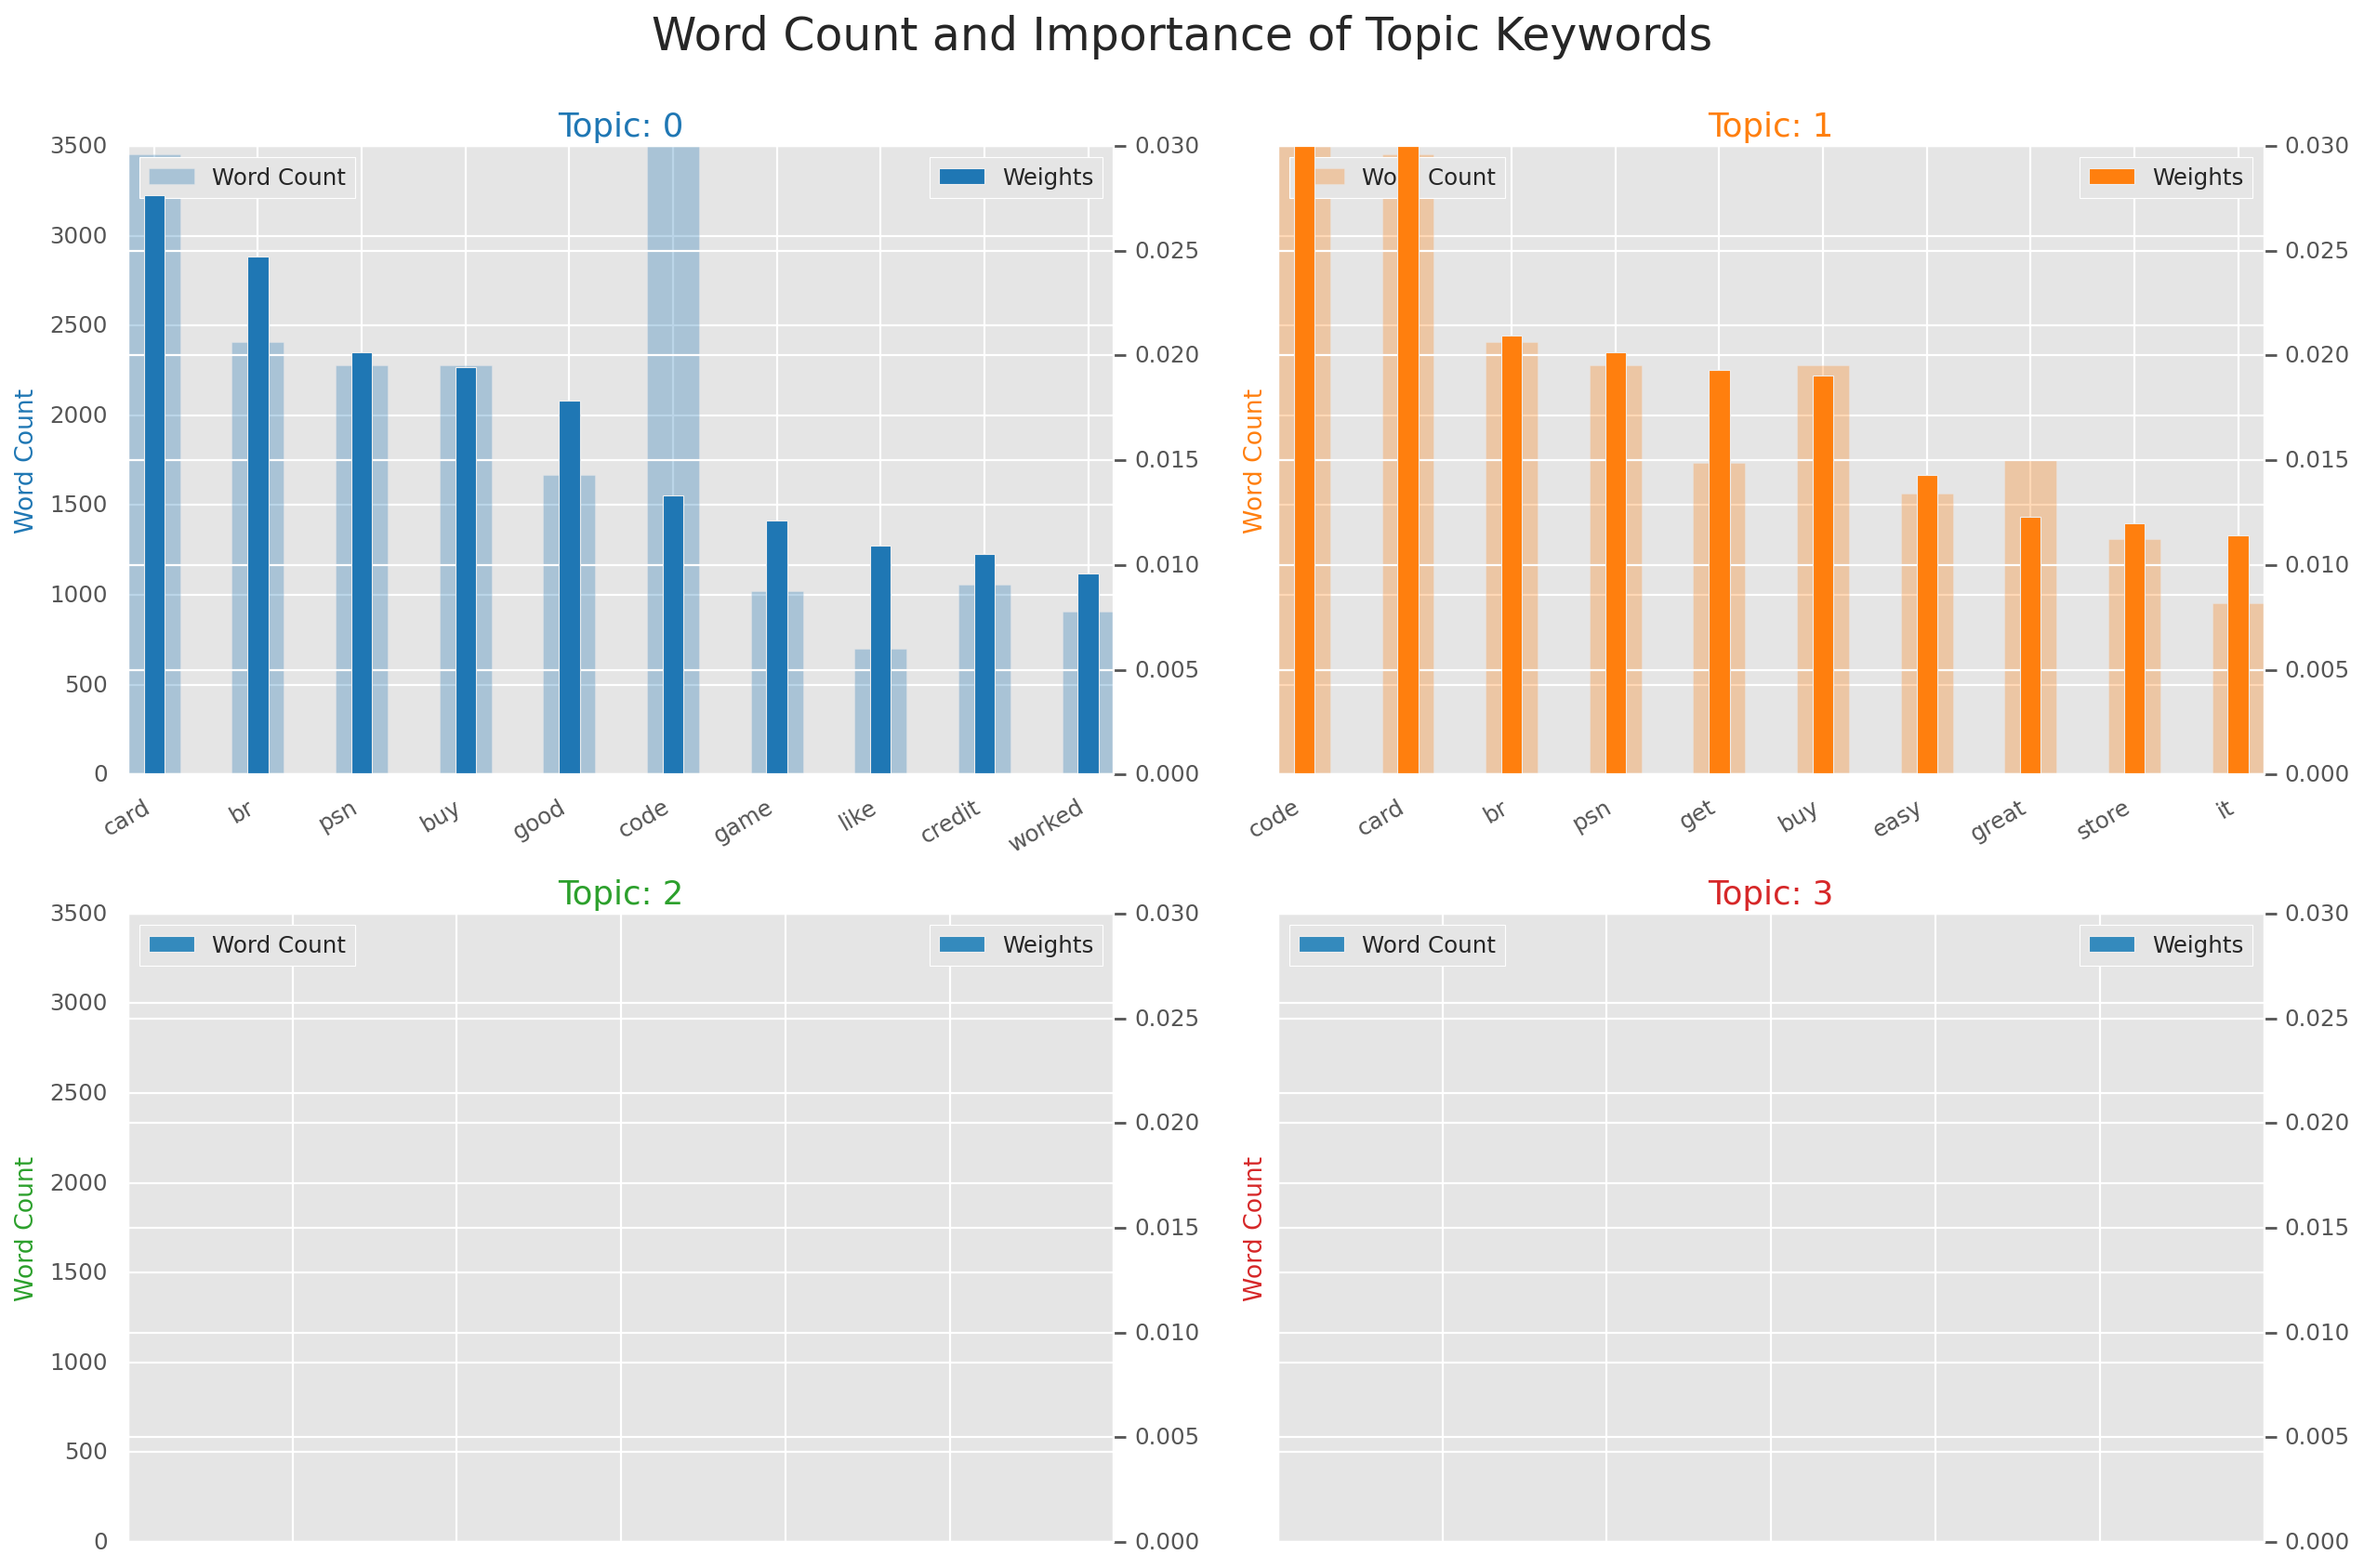

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()


## **Modelling**

In [ ]:
# Convert the text into numbers to be used by the model
vect = TfidfVectorizer()

In [ ]:
X = df_product['reviewText']
Y = df_product['review_sentiment']
X = vect.fit_transform(df_product['reviewText'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [ ]:
print("Size of x_train: ",(x_train.shape))
print("Size of y_train: ",(y_train.shape))
print("Size of x_test: ",(x_test.shape))
print("Size of y_test: ",(y_test.shape))

Size of x_train:  (10812, 6968)
Size of y_train:  (10812,)
Size of x_test:  (2704, 6968)
Size of y_test:  (2704,)


**SVCmodel**

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 95.45%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[ 130   96]
 [  27 2451]]


              precision    recall  f1-score   support

    Negative       0.83      0.58      0.68       226
    Positive       0.96      0.99      0.98      2478

    accuracy                           0.95      2704
   macro avg       0.90      0.78      0.83      2704
weighted avg       0.95      0.95      0.95      2704



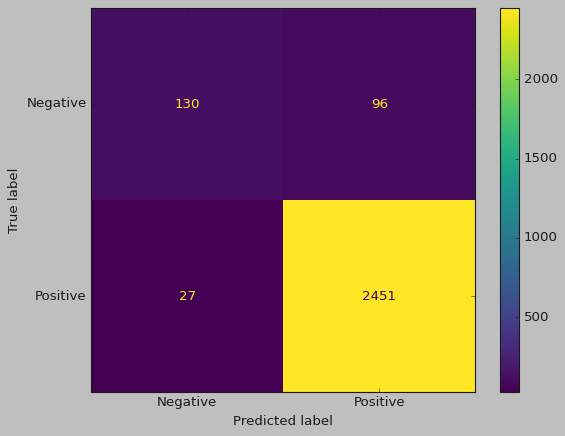

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels = SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVCmodel.classes_)
disp.plot()

In [ ]:
# Hyper parameter tunning

param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(SVCmodel, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.923 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.925 total time=   0.0s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.924 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.924 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.923 total time=   0.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.946 total time=   0.0s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.949 total time=   0.0s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.949 total time=   0.0s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.949 total time=   0.0s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.942 total time=   0.0s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.958 total time=   0.0s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("Best Cross Validation Score: (:.2f)", format(grid.best_score_))
print("Best parameter: ", grid.best_params_)

Best Cross Validation Score: (:.2f) 0.9610618068662131
Best parameter:  {'C': 1, 'loss': 'squared_hinge'}


In [ ]:
# Now let us apply the best score to our SVC model
SVCmodel = LinearSVC(C=1, loss='squared_hinge')
SVCmodel.fit(x_train,y_train)
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 95.45%


In [ ]:
SVCmodel.predict(x_test[29])

array(['Positive'], dtype=object)

**Logistic Regression Model**

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

Test accuracy : 94.38%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[  83  143]
 [   9 2469]]


              precision    recall  f1-score   support

    Negative       0.90      0.37      0.52       226
    Positive       0.95      1.00      0.97      2478

    accuracy                           0.94      2704
   macro avg       0.92      0.68      0.75      2704
weighted avg       0.94      0.94      0.93      2704



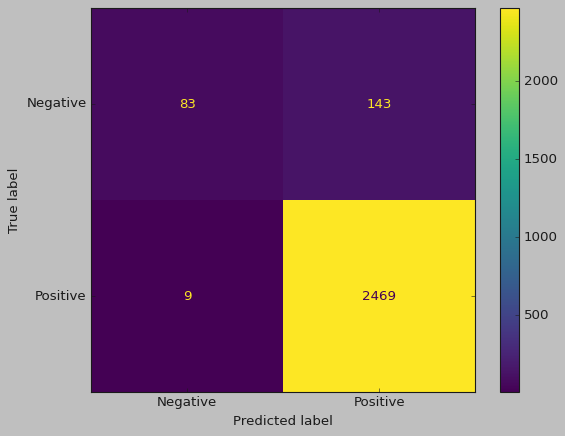

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [ ]:
param_grid = {'C':[0.001,0.01,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10]})

In [ ]:
print("Best parameters : ", grid.best_params_)

Best parameters :  {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.27%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 123  103]
 [  25 2453]]


              precision    recall  f1-score   support

    Negative       0.83      0.54      0.66       226
    Positive       0.96      0.99      0.97      2478

    accuracy                           0.95      2704
   macro avg       0.90      0.77      0.82      2704
weighted avg       0.95      0.95      0.95      2704



## **Neural Network Models**

**Preparing the embeddig layer**

In [ ]:
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM

In [ ]:
x = df_product['reviewText']
y = df_product['review_sentiment']
y = y.astype(str)



X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Instantiate the transformers
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer(use_idf=False)

# Fit and transform on the training data
X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Transform the test data using the same transformers
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
X_train_tfidf.shape, X_test_tfidf.shape

((10812, 6239), (2704, 6239))

**LSTM Classifier**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode your labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Encode your test labels
y_test_encoded = le.fit_transform(y_test)


In [ ]:
# Assuming that your data is already preprocessed and each document is represented as a list of indices
# X_train_tfidf is your data and y_train are your labels

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out


In [ ]:
# Assuming that your data is already preprocessed and each document is represented as a list of indices
# X_train_tfidf is your data and y_train are your labels

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out


In [ ]:
num_classes = len(np.unique(y_train))

In [ ]:
embedding_dim = 12528  # This might depend on the size of your vocabulary or the word vectors you are using.
hidden_dim = 128     # This can be adjusted, common values are 128, 256, 512, etc.
output_dim = num_classes       # This is typically 1 for binary classification tasks, or equal to the number of classes for multi-class classification.
learning_rate = 0.01  # Common values are 0.1, 0.01, 0.001, etc. This should be tuned for your specific task.

In [ ]:
# Create the model, loss function and optimizer
model = LSTMClassifier(embedding_dim, hidden_dim, output_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [ ]:
# Convert your data and labels to tensors, change datatype to float/long, and add a sequence length dimension
inputs = torch.from_numpy(X_train_tfidf.toarray()).float().unsqueeze(1)
labels = torch.tensor(y_train_encoded).long()
labels.shape


torch.Size([10812])

In [ ]:
# Create lists to store loss and accuracy values
train_loss = []
train_acc = []

num_epochs=30

# Training loop
for epoch in range(num_epochs):
    # Clear the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = loss_function(outputs, labels)

    # Calculate accuracy
    acc = accuracy(outputs, labels)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss and accuracy for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Accuracy: {acc.item()}')

    # Append loss and accuracy for plotting
    train_loss.append(loss.item())
    train_acc.append(acc.item())


Epoch 1/30, Loss: 0.6926358938217163, Accuracy: 0.5482797026634216
Epoch 2/30, Loss: 0.688732385635376, Accuracy: 0.7605438232421875
Epoch 3/30, Loss: 0.6848713159561157, Accuracy: 0.8905845284461975
Epoch 4/30, Loss: 0.6810522675514221, Accuracy: 0.9222160577774048
Epoch 5/30, Loss: 0.6772747039794922, Accuracy: 0.9232334494590759
Epoch 6/30, Loss: 0.673538327217102, Accuracy: 0.9232334494590759
Epoch 7/30, Loss: 0.6698424816131592, Accuracy: 0.9232334494590759
Epoch 8/30, Loss: 0.6661868095397949, Accuracy: 0.9232334494590759
Epoch 9/30, Loss: 0.6625708341598511, Accuracy: 0.9232334494590759
Epoch 10/30, Loss: 0.6589941382408142, Accuracy: 0.9232334494590759
Epoch 11/30, Loss: 0.6554564833641052, Accuracy: 0.9232334494590759
Epoch 12/30, Loss: 0.6519569754600525, Accuracy: 0.9232334494590759
Epoch 13/30, Loss: 0.6484955549240112, Accuracy: 0.9232334494590759
Epoch 14/30, Loss: 0.6450715661048889, Accuracy: 0.9232334494590759
Epoch 15/30, Loss: 0.6416847705841064, Accuracy: 0.92323344

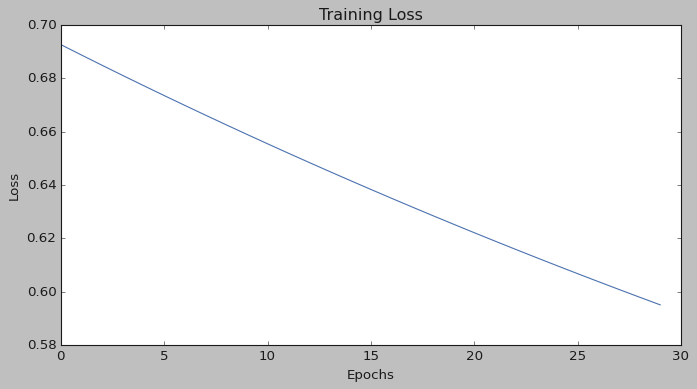

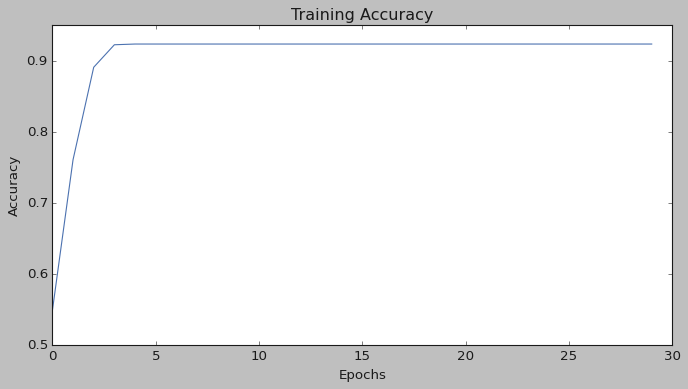

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Assuming X_test_tfidf is a 2D array of shape (num_samples, num_features)
X_test_tfidf_tensor = torch.from_numpy(X_test_tfidf.toarray()).float()

# Add an extra dimension for sequence length (assuming sequence length of 1)
X_test_tfidf_tensor = X_test_tfidf_tensor.unsqueeze(1)


In [ ]:
X_train_tfidf.shape, X_test_tfidf_tensor.shape

((10812, 6239), torch.Size([2704, 1, 6239]))

In [ ]:
# Get the model's predictions for the test data
outputs_test = model(X_test_tfidf_tensor)
_, predicted_test = torch.max(outputs_test, 1)

In [ ]:
# Convert your test labels to a tensor and change datatype to long
y_test_encoded_tensor = torch.tensor(y_test_encoded).long()

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert your test labels to a tensor and change datatype to long
y_test_encoded_tensor = torch.tensor(y_test_encoded).long()

# Create a confusion matrix
cm = confusion_matrix(y_test_encoded_tensor.numpy(), predicted_test.numpy())
print(cm)

[[   0  226]
 [   0 2478]]


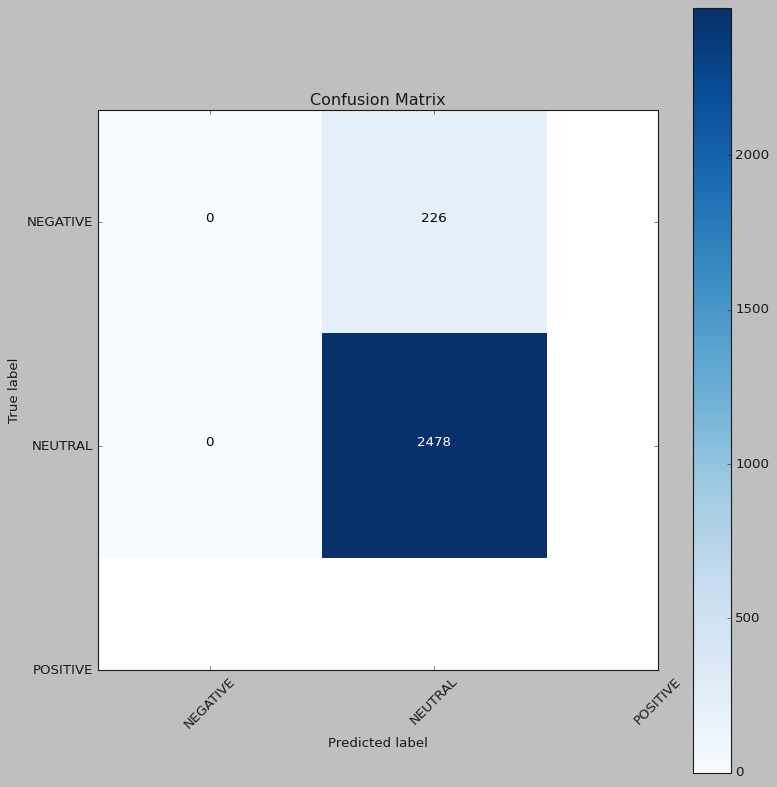

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Create a confusion matrix
cm = confusion_matrix(y_test_encoded_tensor.numpy(), predicted_test.numpy())

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
class_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']  # change this to your class names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add numbers to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Add labels and show the plot
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test_encoded_tensor.numpy(), predicted_test.numpy()))
lstm = accuracy_score(y_test_encoded_tensor.numpy(), predicted_test.numpy())
print('Accuracy: {}'.format(lstm) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       226
           1       0.92      1.00      0.96      2478

    accuracy                           0.92      2704
   macro avg       0.46      0.50      0.48      2704
weighted avg       0.84      0.92      0.88      2704

Accuracy: 0.9164201183431953
